Correlazione tra voto e sport professato

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('input_exams_.csv', sep=';')
df['optional'] = df['optional'].replace(['No','no'], np.nan)
#df['tot'] = df['tot'].replace([np.nan], None)
#df['passed'] = df['passed'].replace([np.nan], None)
df.head()

,Name,Year,semester,CFU,group,optional,max_stud,passed,tot,18,...,21,22,23,24,25,26,27,28,29,30
0,Computer-aided simulations lab,2,1,8,0,3,NaN,28.0,74.0,2.0,...,0.0,1.0,3.0,0.0,1.0,1.0,1.0,2.0,5.0,10.0
1,Data management and visualization,1,1,8,0,NaN,NaN,180.0,229.0,26.0,...,7.0,3.0,10.0,9.0,20.0,14.0,22.0,17.0,18.0,7.0
2,Data science lab: process and methods,1,1,8,"0,4",NaN,NaN,179.0,274.0,7.0,...,12.0,13.0,13.0,17.0,12.0,24.0,14.0,10.0,14.0,23.0
3,Computational linear algebra for large scale p...,1,1,8,0,1,NaN,56.0,75.0,0.0,...,0.0,0.0,1.0,2.0,5.0,2.0,2.0,13.0,4.0,27.0
4,Statistical methods in data science,1,1,8,0,1,NaN,135.0,208.0,21.0,...,7.0,5.0,10.0,4.0,4.0,6.0,11.0,13.0,9.0,19.0


In [2]:
from labg5 import Exam, Student

In [3]:
exams = []
for i,row in df.iterrows():
    if not pd.isna(row['Name']):
        exam = Exam(
            name = row['Name'],
            year = row['Year'],
            semester = row['semester'],
            passed = row['passed'],
            tot = row['tot'],
            cfu = row['CFU'],
            optional = row['optional'],
            max_stud = row['max_stud'] if not pd.isna(row['max_stud']) else None,
            grade_distr= [row[f'{i}'] for i in range(18,31)]
        )
        exams.append(exam)
print([exam.name for exam in exams])

applied_exam = [exam for exam in exams if exam.name == 'Applied data science project'][0]
print(applied_exam.name,applied_exam.max_stud)

['Computer-aided simulations lab', 'Data management and visualization', 'Data science lab: process and methods', 'Computational linear algebra for large scale problems', 'Statistical methods in data science', 'Decision making and optimization', 'Information Theory for Data Science', 'Numerical optimization for large scale problems and Stochastic Optimization', 'Object oriented programming', 'Data Ethics and Data Protection', 'Distributed architectures for big data processing and analytics', 'Machine learning and Deep learning', 'Mathematics in Machine Learning', 'Innovation Management', 'Network Dynamics and Learning', 'Time dependent data with Markov chains', 'Deep natural language processing', 'Machine learning for IOT', 'Applied data science project', 'Challenge', 'Free ECTS credits', 'BioQuants', 'Cloud Computing', 'Computational intelligence', 'Financial Engineering', 'Human Computer Interaction', 'Information systems', 'Information systems security', 'Metodi quantitativi per la g

In [4]:
applied = False
i = 0
c = 0
while not applied and i < 200:
    student = Student(all_exams=exams)    
    if 'Machine learning and Deep learning' in [exam.name for exam in student.exams_to_take]:
        c += 1
    i+=1
if c:
    print(f'Number of students that choose MLDL: {c} ({c/i * 100:.2f}%)')
else:
    print('Not a single Applied student')

Number of students that choose MLDL: 200 (100.00%)


In [5]:
print([(exam.name,exam.studs) for exam in exams])

[('Computer-aided simulations lab', 84), ('Data management and visualization', 200), ('Data science lab: process and methods', 200), ('Computational linear algebra for large scale problems', 48), ('Statistical methods in data science', 152), ('Decision making and optimization', 27), ('Information Theory for Data Science', 12), ('Numerical optimization for large scale problems and Stochastic Optimization', 43), ('Object oriented programming', 118), ('Data Ethics and Data Protection', 200), ('Distributed architectures for big data processing and analytics', 200), ('Machine learning and Deep learning', 200), ('Mathematics in Machine Learning', 200), ('Innovation Management', 200), ('Network Dynamics and Learning', 96), ('Time dependent data with Markov chains', 20), ('Deep natural language processing', 122), ('Machine learning for IOT', 78), ('Applied data science project', 35), ('Challenge', 91), ('Free ECTS credits', 0), ('BioQuants', 27), ('Cloud Computing', 62), ('Computational intell

In [6]:
import random
TOT_CFU = 132

def generate_accademic_plan(exams: list):
        exam_dict = {}
        mandatory, chosen = [], []
        for exam in exams:
            optional = exam.optional
            if optional is not np.nan:
                if optional not in exam_dict:
                    exam_dict[optional] = [exam]
                else:
                    exam_dict[optional].append(exam)
            else:
                mandatory.append(exam)
        for key, exam_table in exam_dict.items():
            exam_table = [exam for exam in exam_table if exam.has_available_space()]
            tots = np.array([exam.tot for exam in exam_table])
            
            # we select the exams based on the past data of the enrollment
            if key != '5' and key != '6':
                chosen_exam = random.choices(exam_table, (tots / sum(tots)))[0]
                chosen_exam.studs += 1
                chosen.append(chosen_exam)
                
            # this is the case for the free credits
            elif key == '5':
                print(f'Table 5: {[exam.name for exam in exam_table]}')
                table_5_choice = random.choices(exam_table)[0]
                print(f'Choice: {table_5_choice.name}')
                if table_5_choice.name == 'Free ECTS credits':
                    table_6 = list(exam_dict['6'])
                    internship = [el for el in table_6 if el.name == 'Internship'][0]
                    table_6.remove(internship)
                    
                    choice = random.choices([internship, table_6], [.40, .60])
                    if isinstance(choice, Exam): # it is the intership
                        chosen.append(choice)
                        
                    elif isinstance(choice, list): # it is the free credits
                        cfus = sum([exam.cfu for exam in mandatory])
                        cfus += sum([exam.cfu for exam in chosen])
                    
                        while cfus < TOT_CFU:
                            tots = np.array([exam.tot for exam in table_6])
                            free_credict_choice = random.choices(table_6, (tots / sum(tots)))[0]
                            cfus += free_credict_choice.cfu
                            table_6.remove(free_credict_choice)
                            chosen.append(free_credict_choice)
                else:
                    chosen.append(table_5_choice)
        return mandatory + chosen
        
accademic_plan = generate_accademic_plan(exams)
[exam.name for exam in accademic_plan]

Table 5: ['Challenge', 'Free ECTS credits']
Choice: Challenge


['Data management and visualization',
 'Data science lab: process and methods',
 'Data Ethics and Data Protection',
 'Distributed architectures for big data processing and analytics',
 'Machine learning and Deep learning',
 'Mathematics in Machine Learning',
 'Innovation Management',
 'Network Dynamics and Learning',
 'Computational linear algebra for large scale problems',
 'Decision making and optimization',
 'Machine learning for IOT',
 'Challenge']

In [7]:
year = 2
semester = 1

def select_tryable_exams(self):
        tryable_exams = [exam for exam in accademic_plan if exam.year <= year and exam.semester <= semester]
        tryable_exams = [(exam, 2) if exam.semester == semester else (exam, 1) for exam in tryable_exams]
        
        selected = []
        n = 4 # THIS AS TO BE AN INPUT

        while n > 0 and tryable_exams:
            exams, attempts = zip(*tryable_exams)
            weights = [attempt / sum(attempts) for attempt in attempts]
            
            chosen = random.choices(exams, weights=weights)[0]
            index = exams.index(chosen)
            
            if attempts[index] > 0:
                if attempts[index] == 2 and n >= 2:
                    selected.append((chosen, attempts[index]))
                    n -= attempts[index]
                else:
                    selected.append((chosen, 1))
                    n -= 1
            tryable_exams = [pair for pair in tryable_exams if not pair[0] == chosen]
        return selected

max_exam = 4
sel = select_tryable_exams(max_exam)
for exam,attempt in sel:
    print(exam.name, exam.year, exam.semester, attempt)

Challenge 2 1 2
Computational linear algebra for large scale problems 1 1 2


In [8]:
def try_exams(max_exam):
    tot_attempt = 0
    for exam, attempt in sel:
        result = None
        while attempt > 0 and result == None:
            result = exam.attempt()
            attempt -= 1
            print(exam.name, result)
            tot_attempt += 1
    if tot_attempt < max_exam:
        print(f'Ho ancora {max_exam - tot_attempt} tentativi')

try_exams(max_exam)

Challenge (None, 8)
Computational linear algebra for large scale problems None
Computational linear algebra for large scale problems (30, 8)
Ho ancora 1 tentativi


In [9]:
exams_taken = [(26,8),(30,8),(25,8)]

sum([grade*cfu for grade,cfu in exams_taken]) / sum([cfu for _,cfu in exams_taken]) * 110/30

99.0

In [10]:
from queue import PriorityQueue

class Session:
    def __init__(self, year: int, semester: int):
        self.year = year
        self.semester = semester
        
    def next_semester(self):
        self.year += (self.semester == 3)
        self.semester = (self.semester % 3) + 1
    
    def __lt__(self, other):
        if self.year == other.year:
            return self.semester < other.semester
        else:
            return self.year < other.year
        
    def __eq__(self, other: object) -> bool:
        return (self.year, self.semester) == (other.year, other.semester)


In [11]:
from labg5 import Session

max_session = Session(5,3)

def simulate(students: list[Student]):
    
    session = Session(1,1)
    graduaded = []
    
    # Event Loop
    while len(students) > 0 and session < max_session:       
        
        for student in students:
            n_exam = student.generate_num_exams(3, 4)
            exams_to_try = student.select_tryable_exams(n_exam, session.year, session.semester)
            
            for exam,n_attempts in exams_to_try:
                attempt = None
                while n_attempts > 0 and attempt is None:
                    attempt = exam.attempt()
                    if attempt:
                        student.exams_to_take.remove(exam)
                        student.exams_taken.append(attempt)

            if student.can_graduate():
                students.remove(student)
                student.calculate_final_grade()
                graduaded.append(student)
        
        session = session.next_semester()
        
    print([student.final_grade for student in graduaded])
    
simulate([Student(exams) for _ in range(300)])

TypeError: Student.can_graduate() missing 1 required positional argument: 'session'

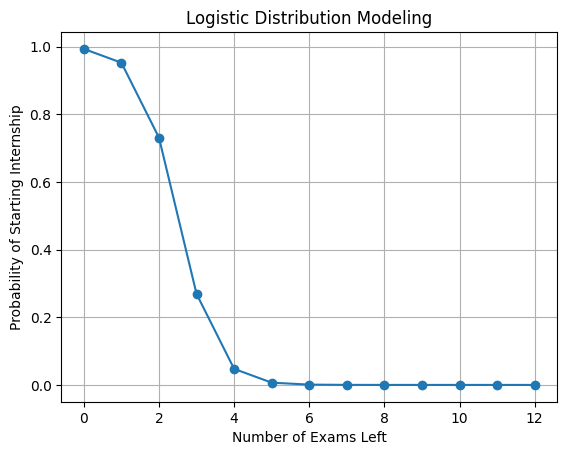

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

exams_left = np.arange(0,13)

# Probability of starting the internship based on the number of exams left
probability = (1 - logistic.cdf(exams_left, loc=2.5, scale=.5))
#probability = [p * 1/max(probability) for p in probability]

# Plotting the probability curve
plt.plot(exams_left, probability, marker='o')
plt.xlabel('Number of Exams Left')
plt.ylabel('Probability of Starting Internship')
plt.title('Logistic Distribution Modeling')
plt.grid()
plt.show()

In [14]:
from labg5 import Session

first = Session(1,1)
second = Session(2,1)

first.more_than(4, second)

False